In [26]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from pathlib import Path
import anndata as ad
import sctk

In [ ]:
INPUT_PATH = "txg-macos-v3.0.1/per_sample_outs"

adatas = {}

for dir_path in Path(INPUT_PATH).iterdir():
    h5_file = next((dir_path / "count").glob("*.h5"))
    adatas[dir_path.name] = sc.read_10x_h5(h5_file)

adatas

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_du

{'L1_S2': AnnData object with n_obs × n_vars = 3654 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L1_S4': AnnData object with n_obs × n_vars = 3976 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L2_S7': AnnData object with n_obs × n_vars = 3648 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L1_S13': AnnData object with n_obs × n_vars = 4044 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L2_S5': AnnData object with n_obs × n_vars = 6844 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L1_S9': AnnData object with n_obs × n_vars = 3633 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L2_S10': AnnData object with n_obs × n_vars = 3205 × 33696
     var: 'gene_ids', 'feature_types', 'genome',
 'L2_S8': AnnData object with n_obs × n_vars = 4669 × 33696
     var: 'gene_ids', 'feature_types', 'genome'}

In [64]:
adata = ad.concat(adatas, label="sample_directory")
adata

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 33673 × 33696
    obs: 'sample_directory'

In [65]:
adata.obs["sample_directory"].value_counts(dropna=False)

sample_directory
L2_S5     6844
L2_S8     4669
L1_S13    4044
L1_S4     3976
L1_S2     3654
L2_S7     3648
L1_S9     3633
L2_S10    3205
Name: count, dtype: int64

In [66]:
adata.obs["library_id"] = adata.obs["sample_directory"].str.split("_").str[0]
adata.obs["sample_id"] = adata.obs["sample_directory"].str.split("_").str[1]

genotype_dict = {
    "S5": "Control",
    "S8": "KO",
    "S13": "KO",
    "S4": "Control",
    "S2": "Control",
    "S7": "Control",
    "S9": "KO",
    "S10": "KO"
}

adata.obs["genotype"] = adata.obs["sample_id"].map(genotype_dict)
adata.obs.drop(columns="sample_directory", inplace=True)

adata

AnnData object with n_obs × n_vars = 33673 × 33696
    obs: 'library_id', 'sample_id', 'genotype'

In [67]:
var_dfs = [obj.var for _, obj in adatas.items()]
var_df = pd.concat(var_dfs)
var_df = var_df[~var_df.index.duplicated(keep="first")]

In [68]:
id_sym_dict = dict(zip(var_df.index, var_df["gene_symbols"]))
id_sym_dict

{'ENSMUSG00000051951': 'Xkr4',
 'ENSMUSG00000089699': 'Gm1992',
 'ENSMUSG00000102331': 'Gm19938',
 'ENSMUSG00000102343': 'Gm37381',
 'ENSMUSG00000025900': 'Rp1',
 'ENSMUSG00000025902': 'Sox17',
 'ENSMUSG00000104238': 'Gm37587',
 'ENSMUSG00000104328': 'Gm37323',
 'ENSMUSG00000033845': 'Mrpl15',
 'ENSMUSG00000120403': 'A930006A01Rik',
 'ENSMUSG00000025903': 'Lypla1',
 'ENSMUSG00000033813': 'Tcea1',
 'ENSMUSG00000002459': 'Rgs20',
 'ENSMUSG00000085623': 'Gm16041',
 'ENSMUSG00000033793': 'Atp6v1h',
 'ENSMUSG00000025905': 'Oprk1',
 'ENSMUSG00000033774': 'Npbwr1',
 'ENSMUSG00000090031': '4732440D04Rik',
 'ENSMUSG00000025907': 'Rb1cc1',
 'ENSMUSG00000087247': 'Alkal1',
 'ENSMUSG00000033740': 'St18',
 'ENSMUSG00000120372': 'Gm57122',
 'ENSMUSG00000051285': 'Pcmtd1',
 'ENSMUSG00000097797': 'Gm26901',
 'ENSMUSG00000103067': 'Gm30414',
 'ENSMUSG00000025909': 'Sntg1',
 'ENSMUSG00000061024': 'Rrs1',
 'ENSMUSG00000025911': 'Adhfe1',
 'ENSMUSG00000079671': '2610203C22Rik',
 'ENSMUSG00000067879': 'Vxn

In [69]:
adata.var["ensembl_ids"] = adata.var.index
adata.var["gene_symbols"] = adata.var["ensembl_ids"].map(id_sym_dict)
adata.var.index = adata.var["gene_symbols"].tolist()
adata.var

ensembl_ids        gene_symbols
Xkr4                ENSMUSG00000051951                Xkr4
Gm1992              ENSMUSG00000089699              Gm1992
Gm19938             ENSMUSG00000102331             Gm19938
Gm37381             ENSMUSG00000102343             Gm37381
Rp1                 ENSMUSG00000025900                 Rp1
...                                ...                 ...
ENSMUSG00000095523  ENSMUSG00000095523  ENSMUSG00000095523
ENSMUSG00000095475  ENSMUSG00000095475  ENSMUSG00000095475
ENSMUSG00000094855  ENSMUSG00000094855  ENSMUSG00000094855
ENSMUSG00000095019  ENSMUSG00000095019  ENSMUSG00000095019
ENSMUSG00000095041  ENSMUSG00000095041  ENSMUSG00000095041

[33696 rows x 2 columns]

In [71]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_na

In [73]:
adata.obs_names_make_unique()

In [74]:
adata.var_names_make_unique()

In [75]:
sc.pp.scrublet(adata, batch_key="sample_id")

In [76]:
sctk.calculate_qc(adata, flags={'hb': '^Hb', 'mito': '^mt-', 'ribo': '^Rp[ls]'})
adata

AnnData object with n_obs × n_vars = 33673 × 23676
    obs: 'library_id', 'sample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50'
    var: 'ensembl_ids', 'gene_symbols', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts'
    uns: 'scrublet'

In [77]:
sctk.cellwise_qc(adata)
adata

n_counts: [933.1479553090849, 106595.0], 30548/33673 passed
n_genes: [424.5002742789588, 9911.00390625], 33360/33673 passed
percent_mito: [0.0, 3.9513386679525704], 32032/33673 passed
percent_ribo: [0.1666249476796734, 20.28418835664997], 33382/33673 passed
percent_hb: [0.0, 0.01807052653931741], 25085/33673 passed
21211/33673 pass


AnnData object with n_obs × n_vars = 33673 × 23676
    obs: 'library_id', 'sample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50', 'cell_passed_qc'
    var: 'ensembl_ids', 'gene_symbols', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts'
    uns: 'scrublet', 'scautoqc_ranges'

In [ ]:
metrics_list = [
    "log1p_n_counts",
    "log1p_n_genes",
    "percent_mito",
    "percent_ribo",
    "percent_hb"
]

sctk.multi_resolution_cluster_qc(adata, metrics = metrics_list)

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/sctk/_pipeline.py:201: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(aux_ad, resolution=res, key_added="qc_cluster")


Best overlap found for resolution 0.8


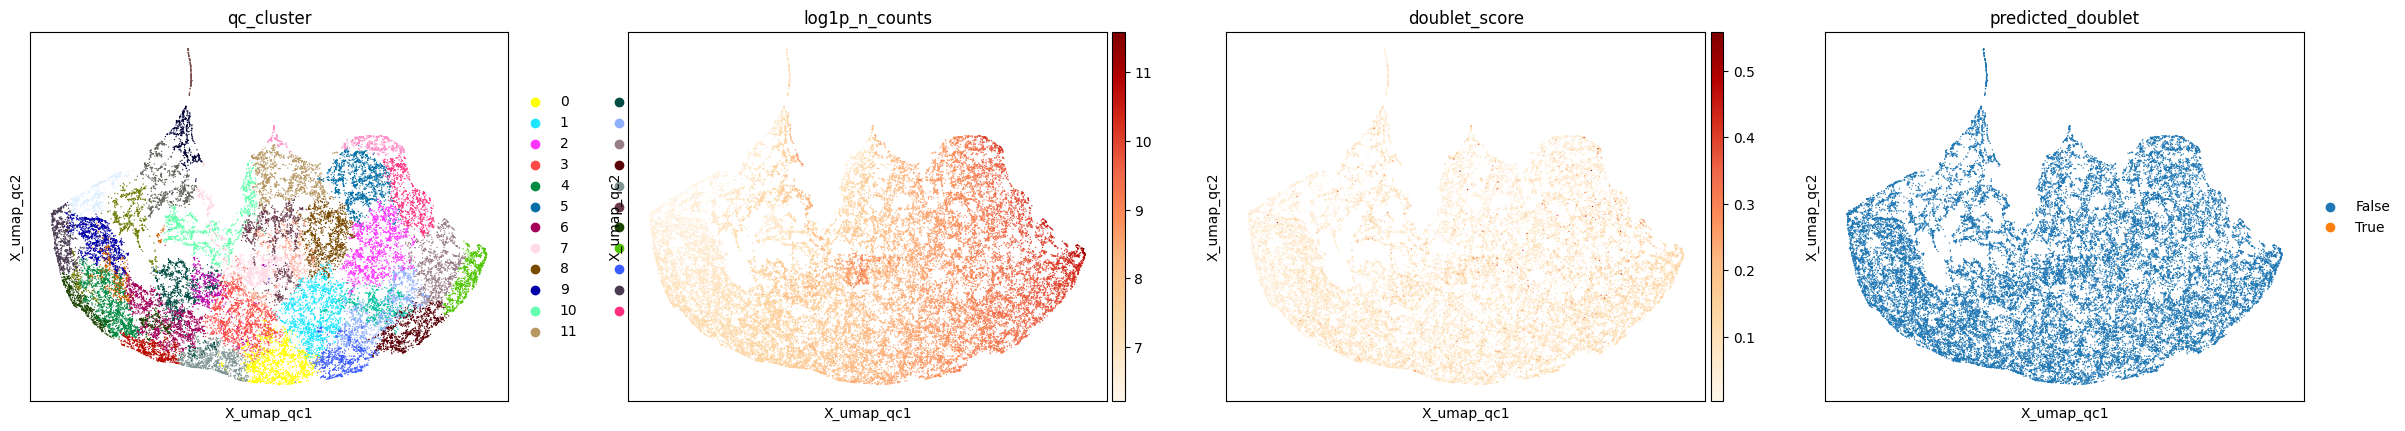

In [ ]:
sc.pl.embedding(
    adata, 
    "X_umap_qc", 
    color=[
        "qc_cluster",
        "log1p_n_counts",
        "doublet_score",
        "predicted_doublet"
    ], 
    color_map="OrRd"
)

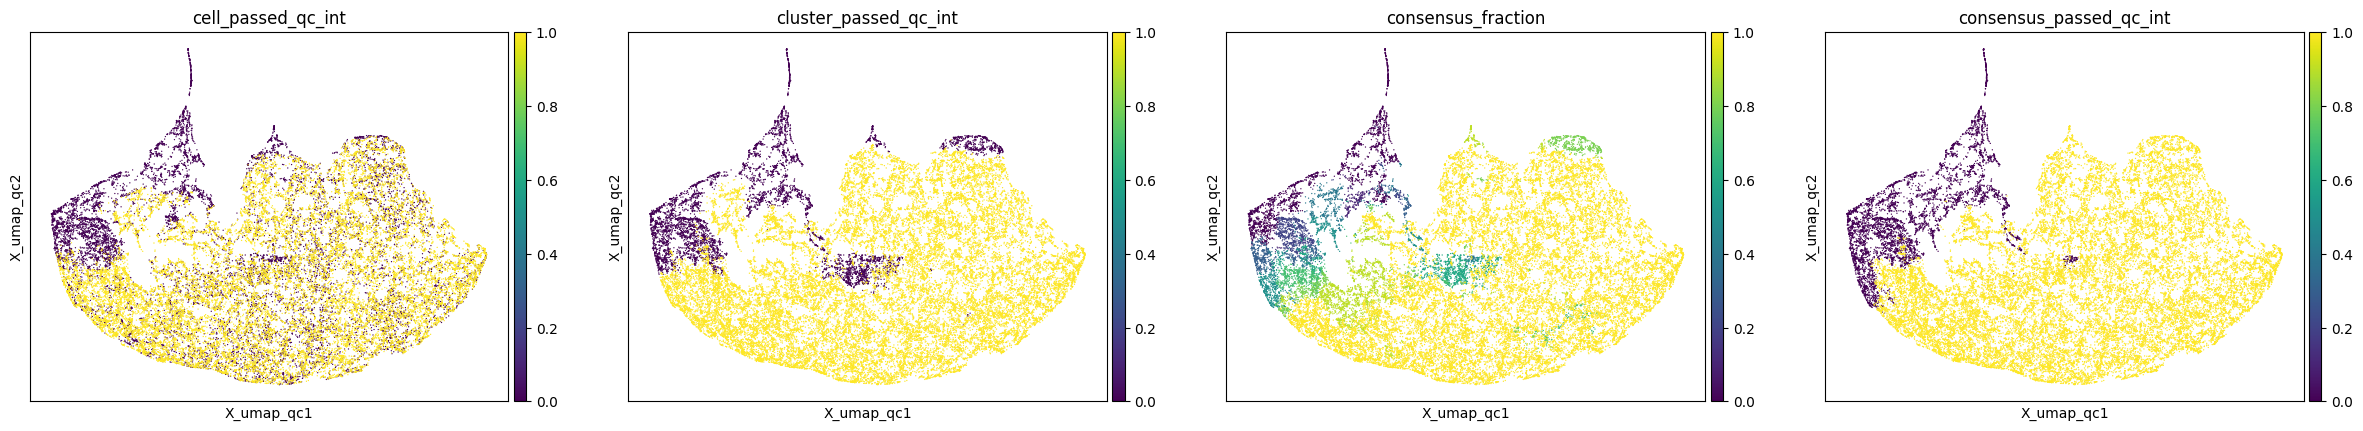

In [80]:
for col in ['cell_passed_qc', 'cluster_passed_qc', 'consensus_passed_qc']:
    adata.obs[col+"_int"] = adata.obs[col].astype(int)
sc.pl.embedding(adata, "X_umap_qc", color=["cell_passed_qc_int",
                                           "cluster_passed_qc_int",
                                           "consensus_fraction",
                                           "consensus_passed_qc_int"])

In [ ]:
adata.uns["scautoqc_ranges"] = adata.uns["scautoqc_ranges"].astype(str)

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [89]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample_id")

In [90]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

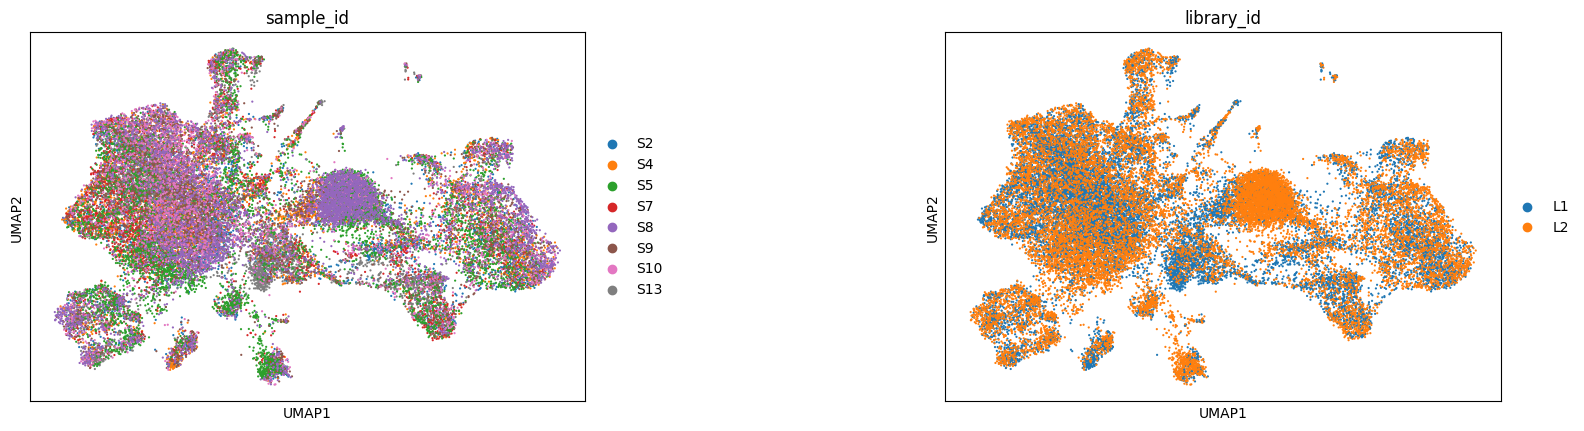

In [94]:
sc.pl.umap(
    adata,
    color=["sample_id", "library_id"],
    size=10,
    wspace=0.5
)

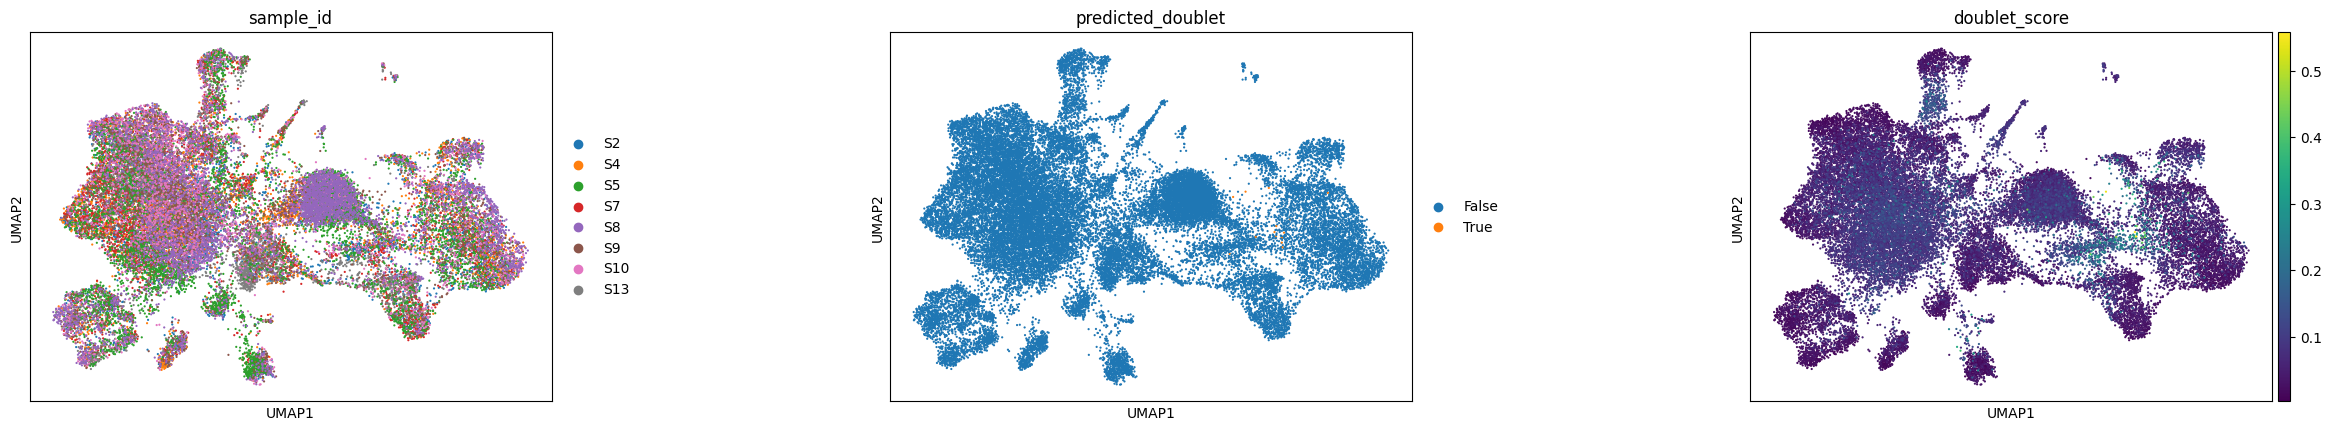

In [ ]:
sc.pl.umap(
    adata,
    color=["sample_id", "predicted_doublet", "doublet_score"],
    wspace=0.5,
    size=10
)

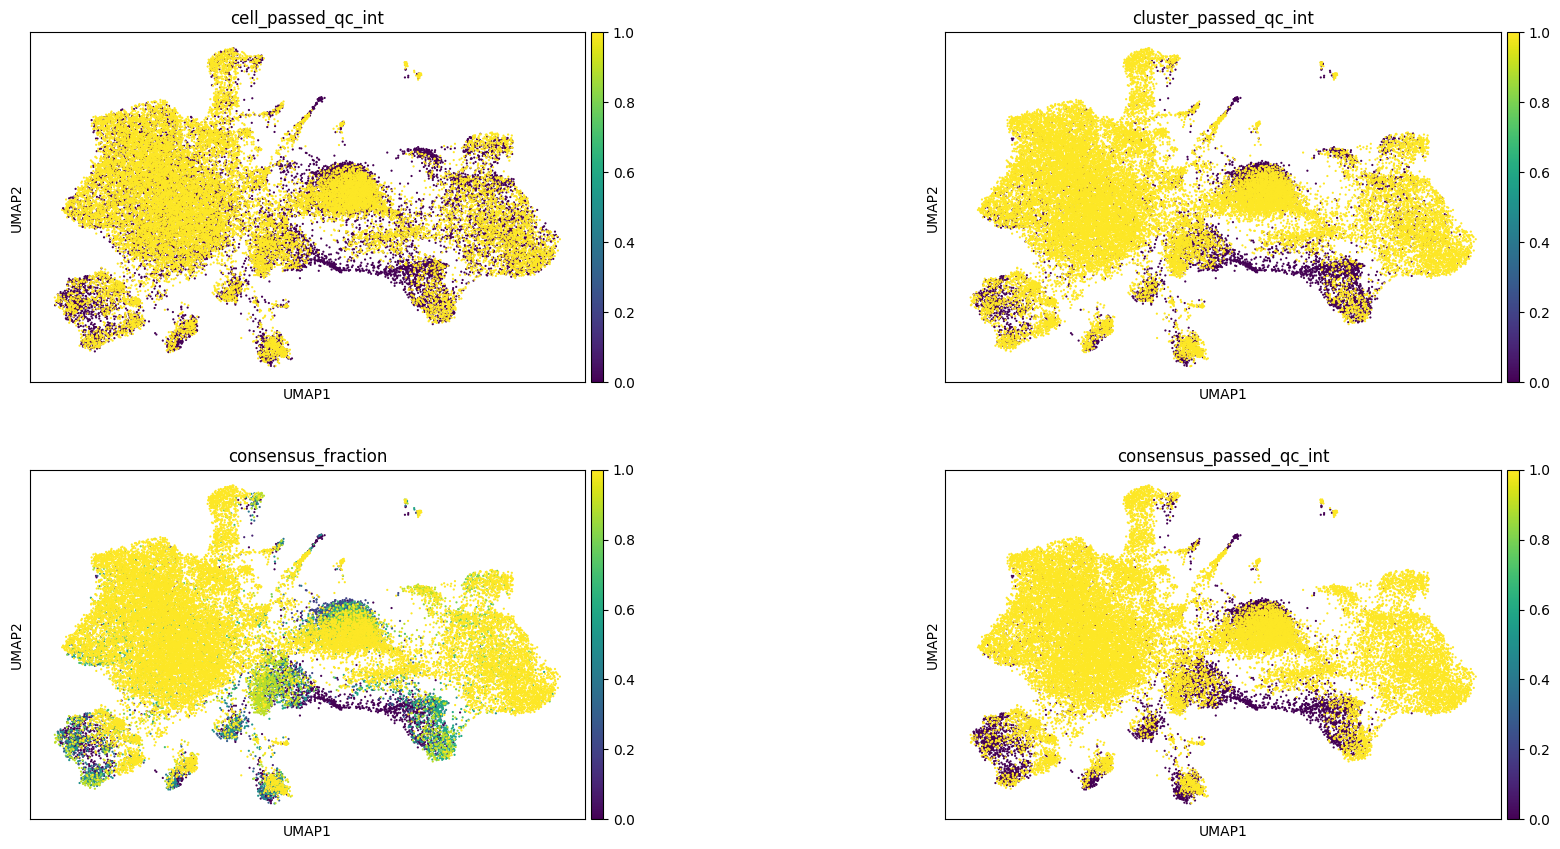

In [96]:
sc.pl.umap(
    adata,
    color=["cell_passed_qc_int", "cluster_passed_qc_int", "consensus_fraction", "consensus_passed_qc_int"],
    wspace=0.5,
    size=10,
    ncols=2
)

In [ ]:
adata_fil = adata[
    (adata.obs["predicted_doublet"] == False) & (adata.obs["consensus_passed_qc_int"] == 1)
].copy()

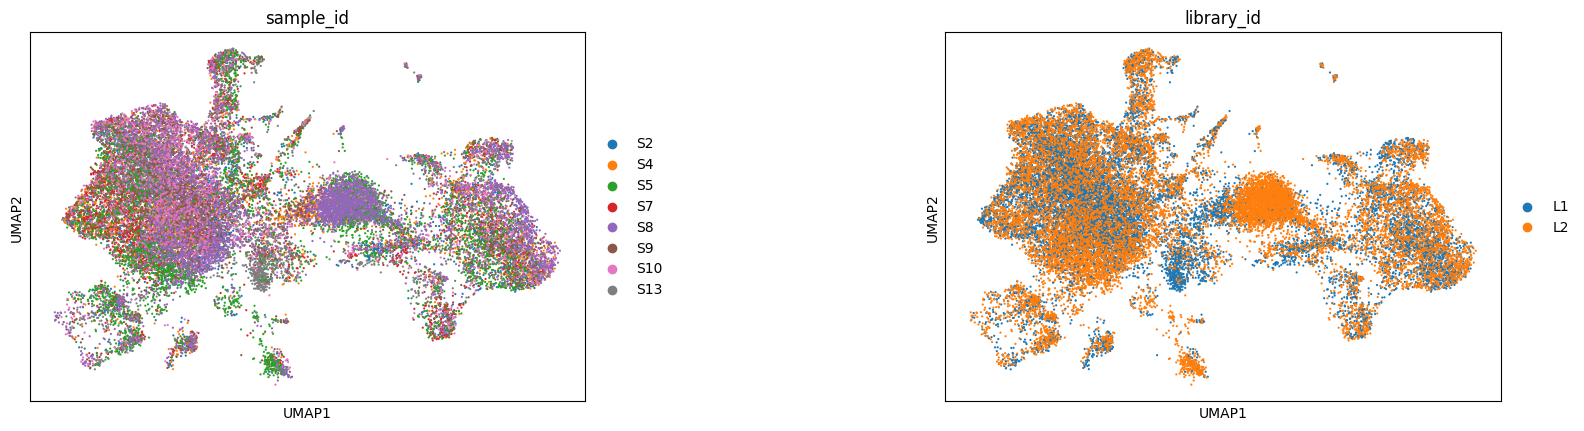

In [99]:
sc.pl.umap(
    adata_fil,
    color=["sample_id", "library_id"],
    size=10,
    wspace=0.5
)

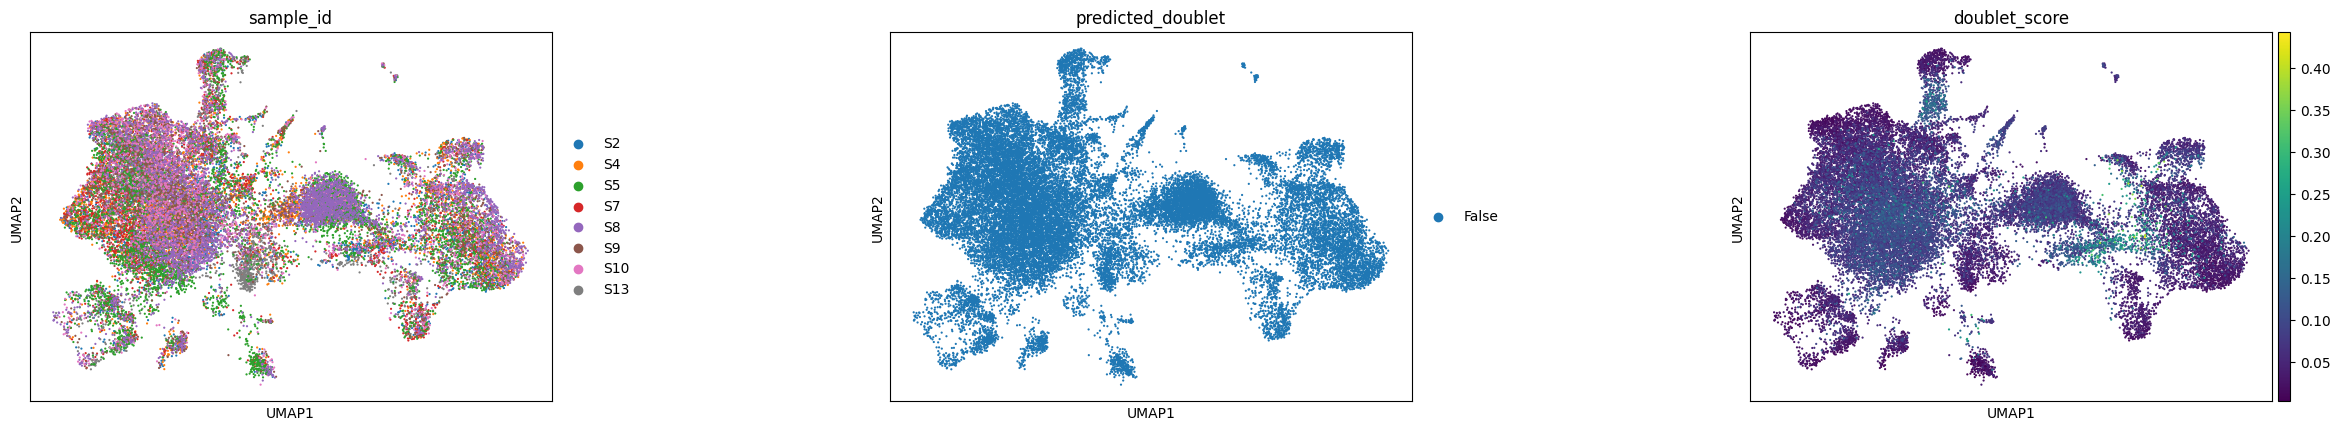

In [100]:
sc.pl.umap(
    adata_fil,
    color=["sample_id", "predicted_doublet", "doublet_score"],
    wspace=0.5,
    size=10
)

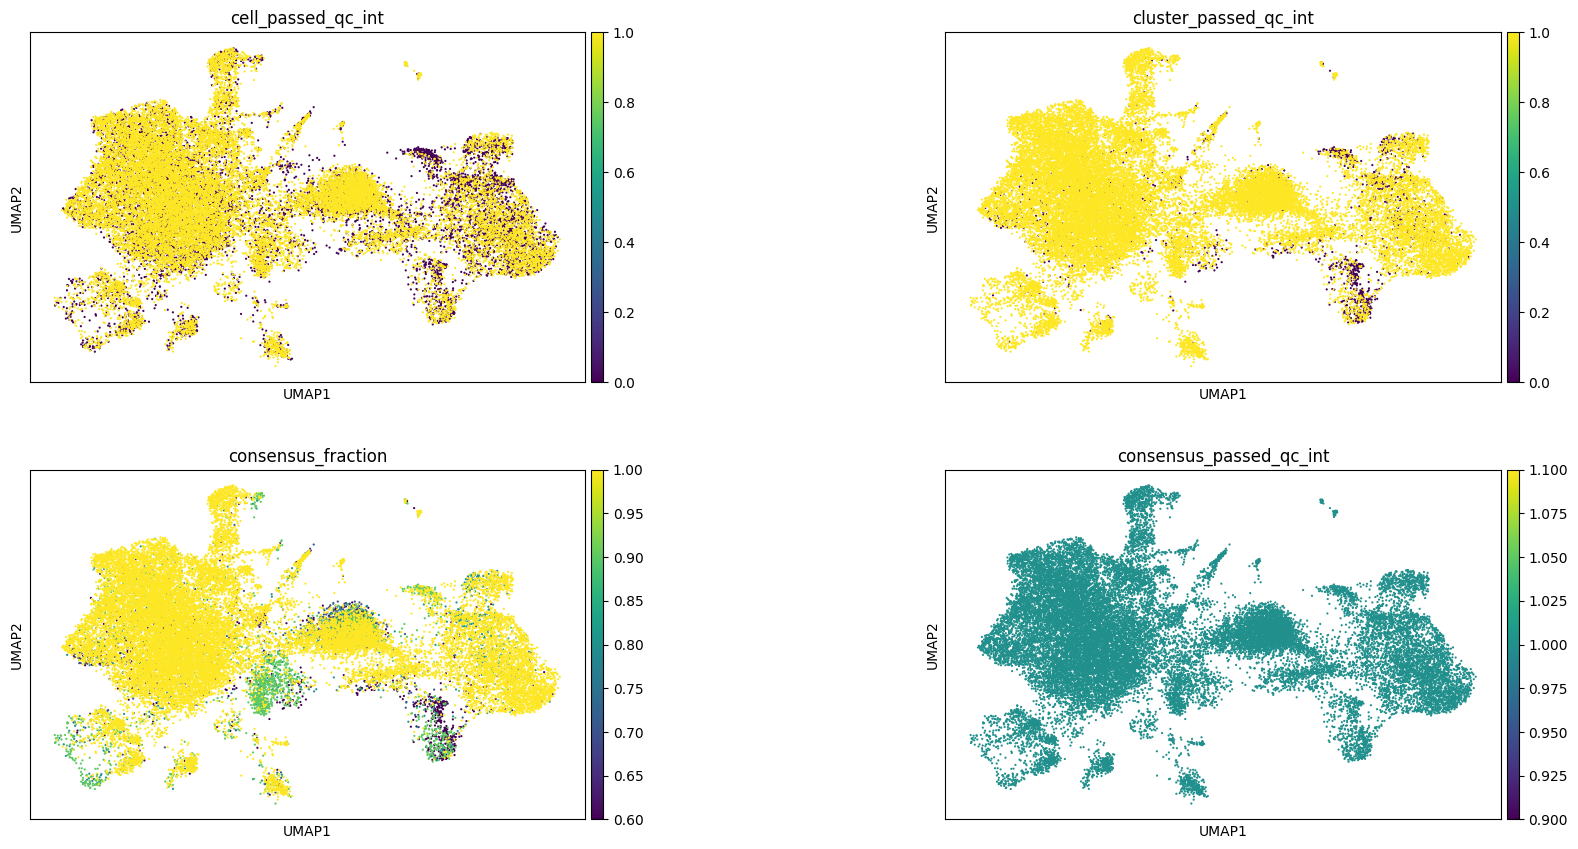

In [101]:
sc.pl.umap(
    adata_fil,
    color=["cell_passed_qc_int", "cluster_passed_qc_int", "consensus_fraction", "consensus_passed_qc_int"],
    wspace=0.5,
    size=10,
    ncols=2
)

In [103]:
adata.write_h5ad("/home/icb/raphael.kfuri-rubens/data/yumm_analysis/anndata_files/immunity_dc_revision_qc_filtered.h5ad")